In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
# Carregar o dataset
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
# informaações básicas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


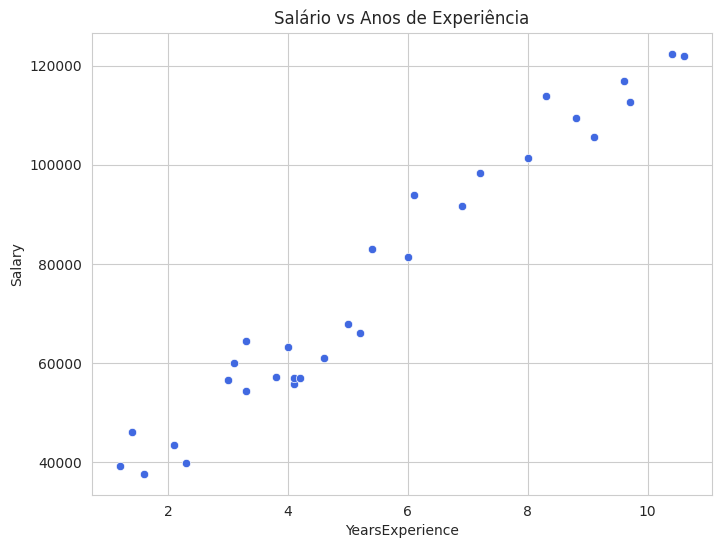

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='royalblue')
plt.title('Salário vs Anos de Experiência')
plt.show()

In [ ]:
# Separar variáveis independentes e dependentes

X = df[['YearsExperience']]  # feature
y = df['Salary']             # target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Treino: {X_train.shape}, Teste: {X_test.shape}')

Treino: (24, 1), Teste: (6, 1)


In [ ]:
# Treinar o modelo

model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes
print("Intercepto (b0):", model.intercept_)
print("Coeficiente (b1):", model.coef_[0])

Intercepto (b0): 24380.201479473704
Coeficiente (b1): 9423.815323030976


In [ ]:
# 6. Fazer previsões e avaliar

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

MAE:  6286.45
RMSE: 7059.04
R²:   0.902


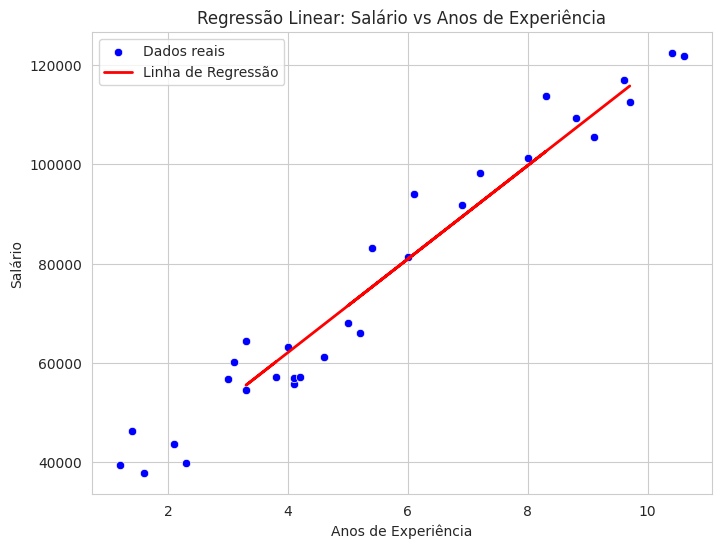

In [ ]:
# Visualização da linha de regressão

plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, label='Dados reais', color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Salário vs Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()